In [1]:
from util import clean_storage_folder
clean_storage_folder.clean_storage('storage')

In [2]:
from data.generate_frame import FrameGenerator as FG
fg = FG('config/config.ini', 'storage')
fg.run()

100%|██████████| 8/8 [00:00<00:00, 4263.59it/s]Making validation data.

100%|██████████| 8/8 [00:00<00:00, 4944.66it/s]Making evaluation data.



In [3]:
from train import Model
M = Model('storage', 'config/config.ini')

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET


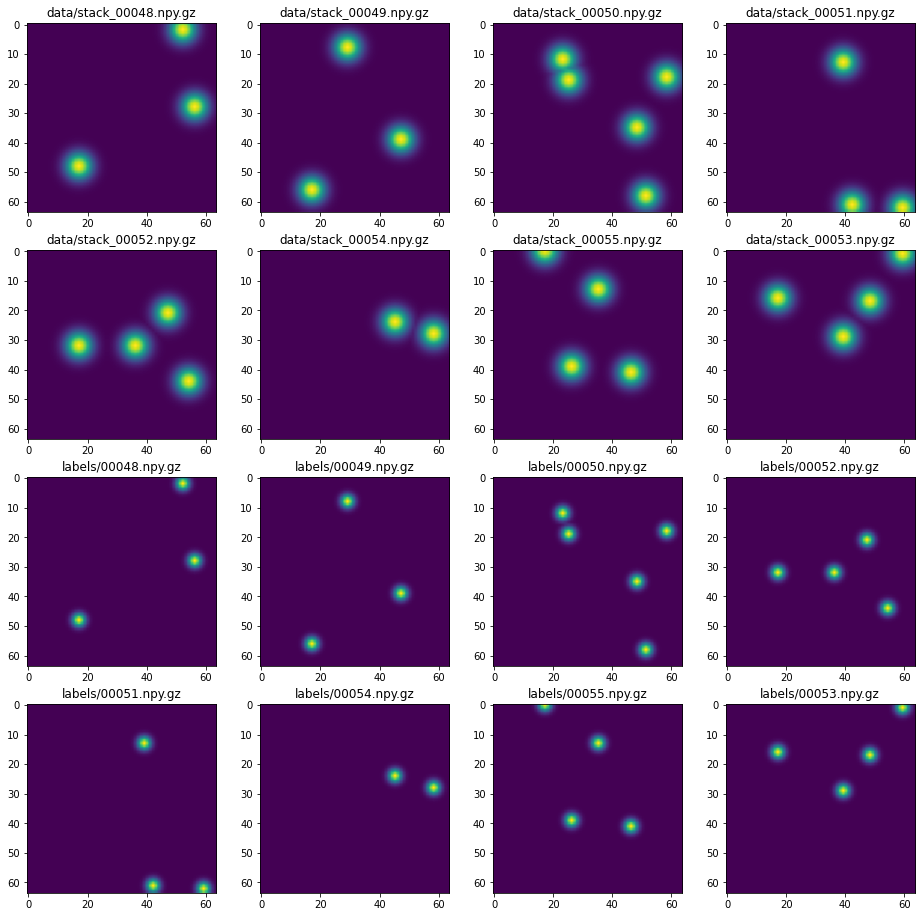

In [4]:
M.print_img('training')


In [5]:
history = M.fit_model()

KERAS AND TENSORFLOW GRAPHS RESET
RANDOM SEEDS RESET
Building model... 

  0%|          | 0/64 [00:00<?, ?it/s]Compiling model... 

Loading data from storage... 

Loading labels from storage... 

100%|██████████| 8/8 [00:00<00:00, 465.43it/s]
Defining training data generator... 

Loading data from storage... 

Loading labels from storage... 

Defining validation data generator... 

Fitting model with validation generator... 

Fitting model with data in memory... 

Epoch 1/20
8/8 [==============================] - ETA: 0s - loss: 0.0563 - mean_squared_error: 0.0563 
Epoch 00001: val_loss improved from inf to 0.00822, saving model to ./output/checkpoints/cp-0001.ckpt
8/8 [==============================] - 91s 11s/step - loss: 0.0563 - mean_squared_error: 0.0563 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 2/20
8/8 [==============================] - ETA: 0s - loss: 0.0078 - mean_squared_error: 0.0078
Epoch 00002: val_loss improved from 0.00822 to 0.00822, saving model to ./ou

KeyboardInterrupt: 

In [3]:
M._load_from_checkpoint('output/checkpoints')

Building model... 



100%|██████████| 32/32 [00:00<00:00, 489.44it/s]Loading data from storage... 


100%|██████████| 32/32 [00:00<00:00, 547.01it/s]Loading scatterer_positions from storage... 


100%|██████████| 32/32 [00:00<00:00, 504.88it/s]Loading data from storage... 

Loading scatterer_positions from storage... 




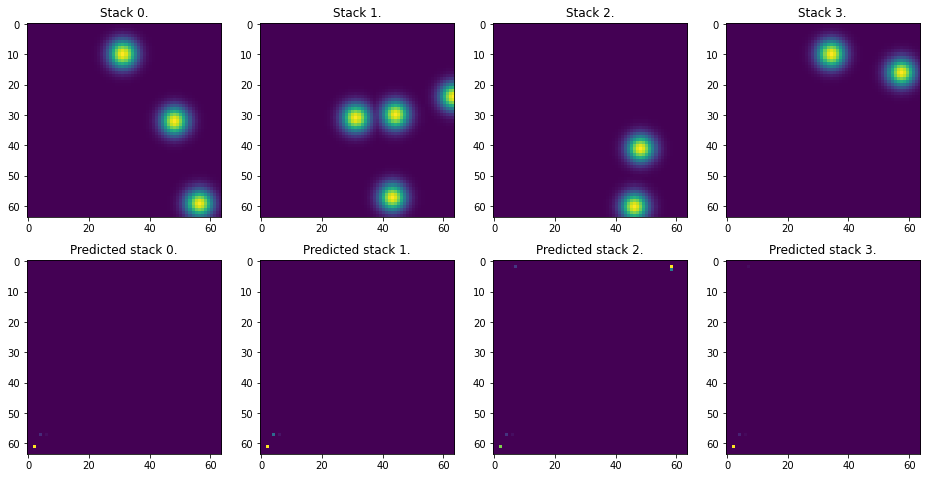

In [4]:
M.compare_predict('evaluation')

In [7]:
b, p, s = M.predict('training')
from eval.evaluate import Evaluator as E
ev = E(M.config, p, b, s)

100%|██████████| 64/64 [00:00<00:00, 939.93it/s]Loading data from storage... 




In [8]:
msk, corr, acc = ev.evaluate()

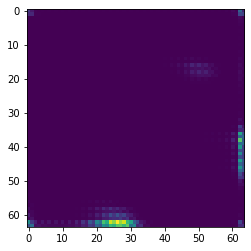

In [9]:
import matplotlib.pyplot as plt
plt.imshow(corr[0,:,:,1])
#plt.savefig('output/center.png')

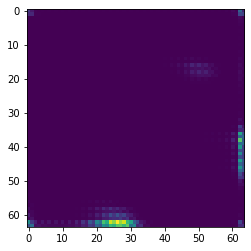

In [10]:
plt.imshow(p[0,:,:,1])
#plt.savefig('output/pred.png')

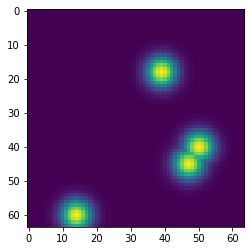

In [11]:
plt.imshow(b[0,:,:,1])
#plt.savefig('output/data.png')

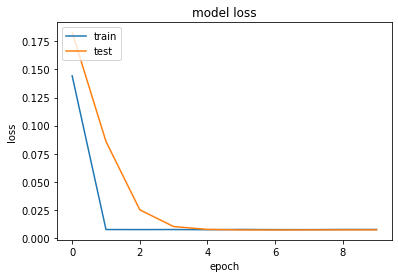

In [12]:
M.illustrate_history(history)

In [13]:
acc

0.0